In [8]:
from data.digitizer import ECGDigitizer
from utils import setCWDToProjectDir
import os

In [2]:
setCWDToProjectDir()

In [9]:
from PIL import Image
%matplotlib inline
data_id = "1744-0"
input_file = f"{data_id}.png"
output_file = "output"
input_directory = "images"

img = Image.open(os.path.join(input_directory, input_file))
img.show()

# Resize the image to 2200x1700 pixels
new_img = img.resize((2200, 1700), Image.BICUBIC)
new_img.save(os.path.join(input_directory, f"{data_id}_resized.png"))
new_img.show()

In [10]:

data_id = "00001_hr-0_0000"
input_file = f"{data_id}.png"
output_file = "output"
input_directory = "images"

digitizer = ECGDigitizer()
signals, signal_names = digitizer.digitize(os.path.join(input_directory, input_file), "output")

print("Signals:", signals)
print("Signal names:", signal_names)



There are 1 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting 00000_temp:
perform_everything_on_device: True
Input shape: torch.Size([1, 3, 1698, 2198])
step_size: 0.5
mirror_axes: (0, 1)
n_steps 27, image size is torch.Size([3, 1698, 2198]), tile_size [1024, 1280], tile_step_size 0.5
steps:
[[0, 337, 674], [0, 459, 918]]
move image to device cuda
preallocating results arrays on device cuda


100%|██████████| 27/27 [00:09<00:00,  2.71it/s]


Prediction done
sending off prediction to background worker for resampling and export
done with 00000_temp
Signals: {'I': array([-0.11625189, -0.11625189, -0.11625189, ..., -0.08440549,
       -0.08440549, -0.08440549], dtype=float32), 'II': array([-0.04272936, -0.04272936, -0.04272936, ...,  0.21204181,
        0.21204183,  0.21204183], dtype=float32), 'III': array([0.06755447, 0.06810733, 0.07059899, ..., 0.07392376, 0.07392376,
       0.07392376], dtype=float32), 'aVR': array([ 0.06208793,  0.06208793,  0.06208793, ..., -0.04285239,
       -0.04036575, -0.03982053], dtype=float32), 'aVL': array([-0.06574903, -0.06629425, -0.06878081, ...,  0.04252871,
        0.04252871,  0.04252871], dtype=float32), 'aVF': array([0.01660024, 0.01714545, 0.01963202, ..., 0.01023096, 0.01023096,
       0.01023096], dtype=float32), 'V1': array([0.05937973, 0.05937973, 0.05937973, ..., 0.0084255 , 0.0084255 ,
       0.0084255 ], dtype=float32), 'V2': array([ 0.06800583,  0.06800583,  0.06800583, ..., -

Shape of data: (5000, 12)
Signal: I


C:\Users\johan\AppData\Local\Temp\ipykernel_20544\1335423965.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  signals_array = np.array(list(signals.values()))


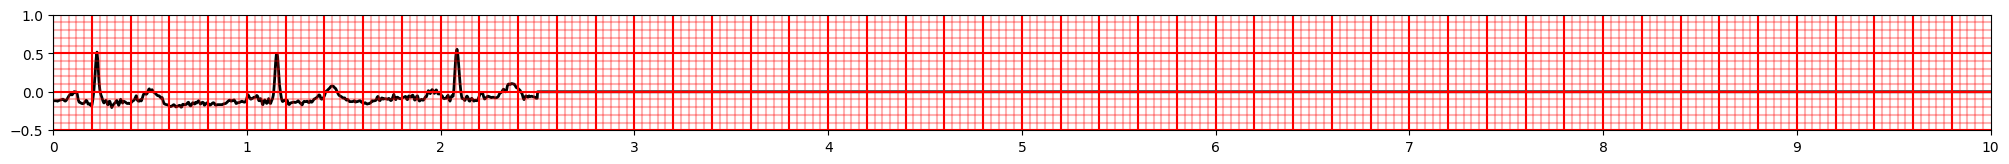

Signal: II


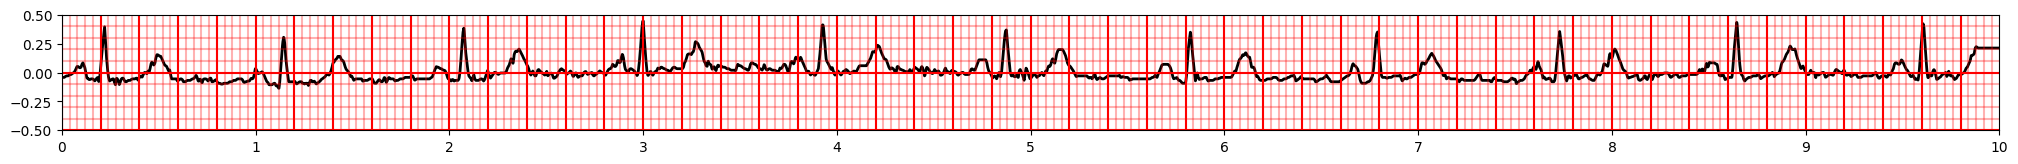

Signal: III


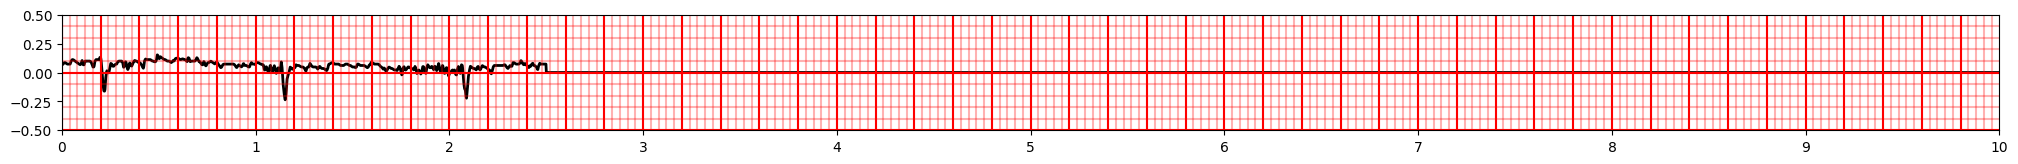

Signal: aVR


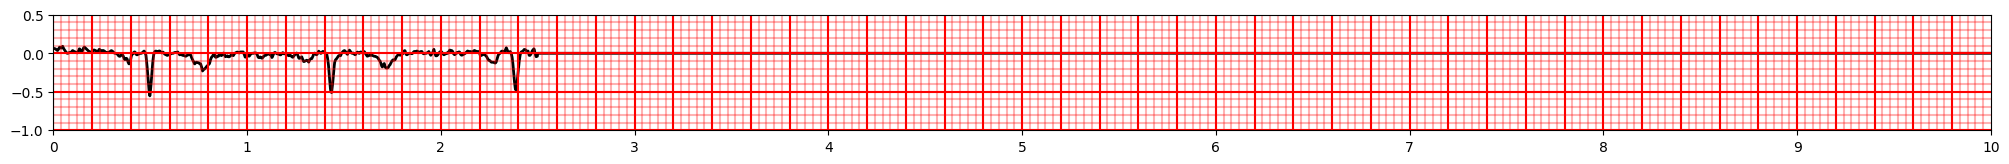

Signal: aVL


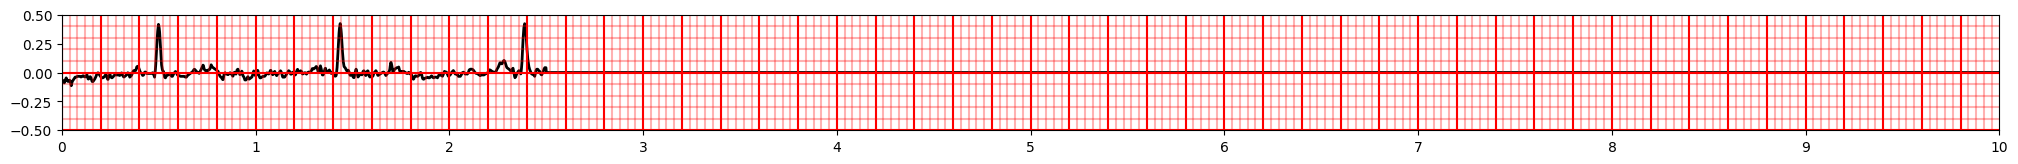

Signal: aVF


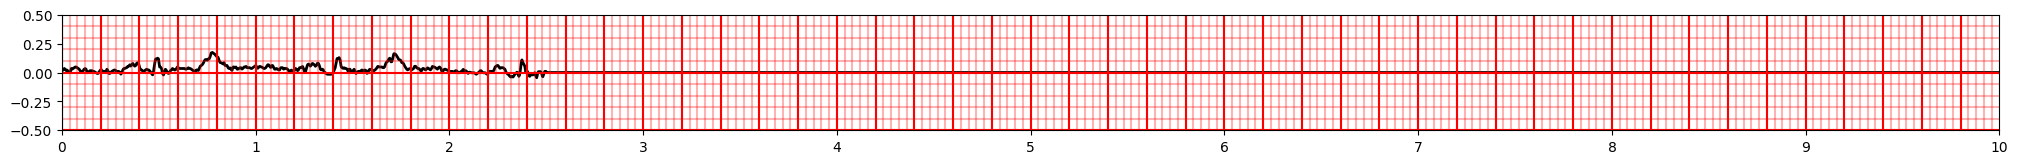

Signal: V1


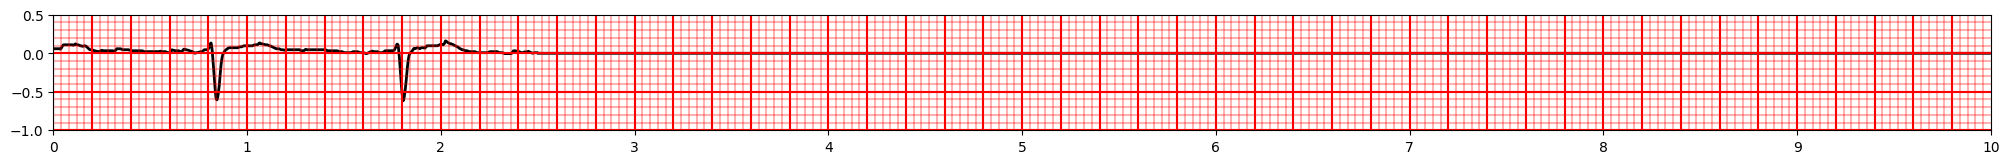

Signal: V2


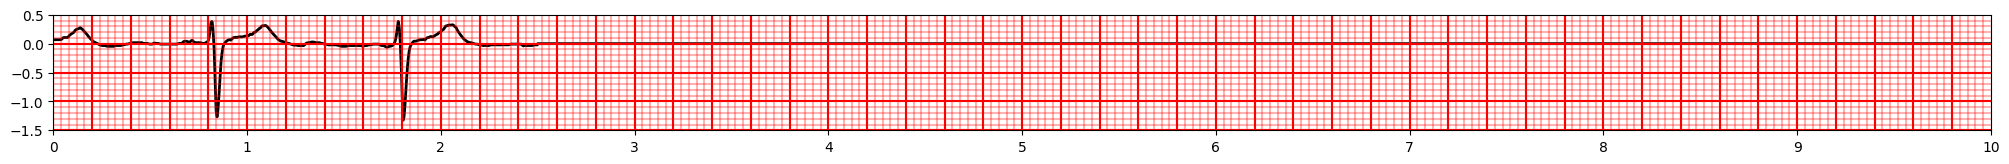

Signal: V3


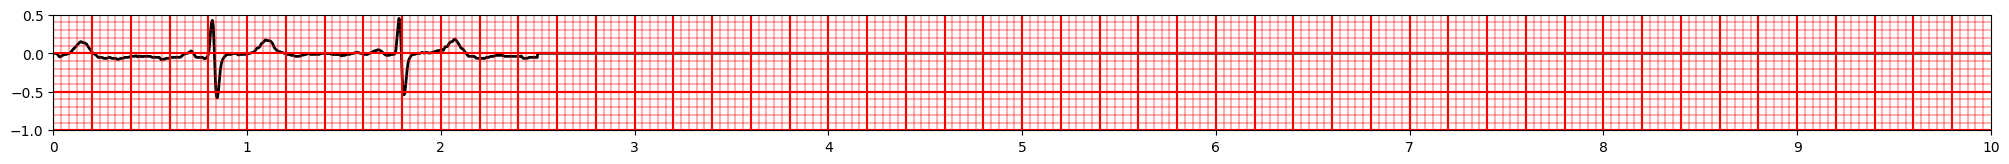

Signal: V4


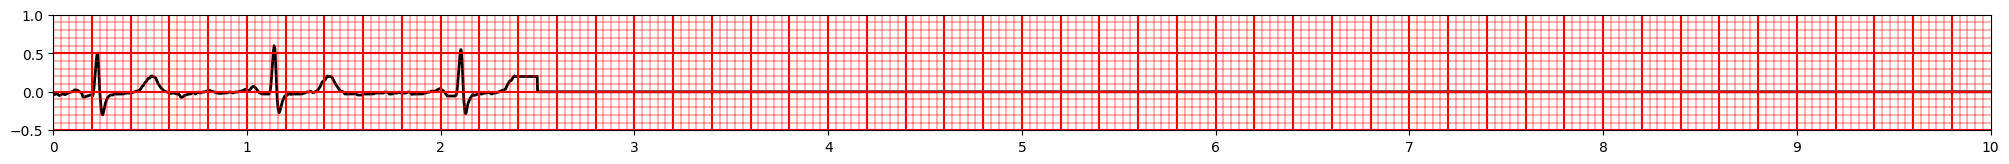

Signal: V5


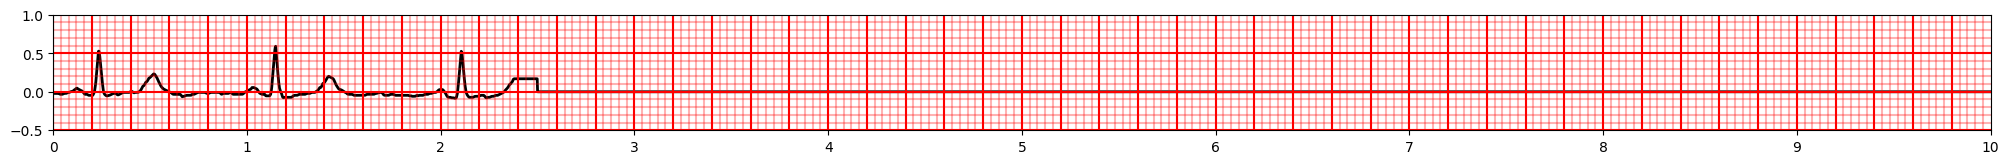

Signal: V6


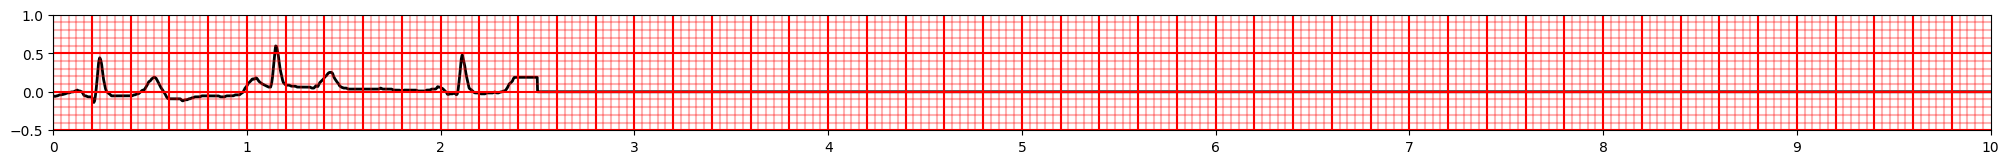

In [11]:
#Convert the signals (dict) into a numpy array
from data.ptbxl.record import Record
import numpy as np
from data.ptbxl import Lead, SamplingRate
from data.ptbxl import PTBXL
import matplotlib.pyplot as plt
import matplotlib
import wfdb
%matplotlib inline

# Convert the signals (dict) into a numpy array
signals_array = np.array(list(signals.values()))
converted_record = Record(wfdb.rdsamp(f"output/{data_id}"))
data = converted_record.data
# print shape of data
print("Shape of data:", data.shape)


#Print the name of the signals (according to the Lead class from PTBXL)
for i in range(len(Lead)):
    print(f"Signal: {Lead(i).name}")
    try:
        converted_record.draw_ecg(Lead(i).value)
    except:
        print(f"Lead {Lead(i).name} not available in the record.")

Signal: I


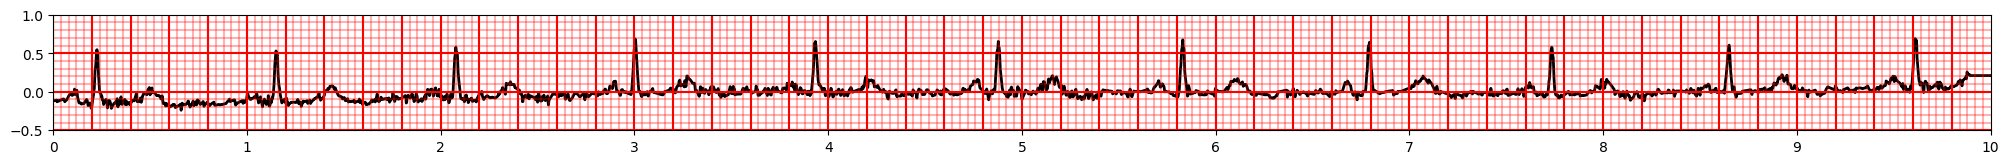

Signal: II


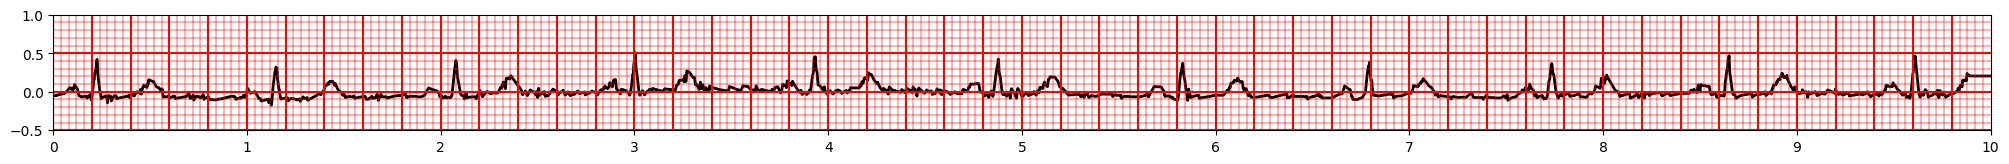

Signal: III


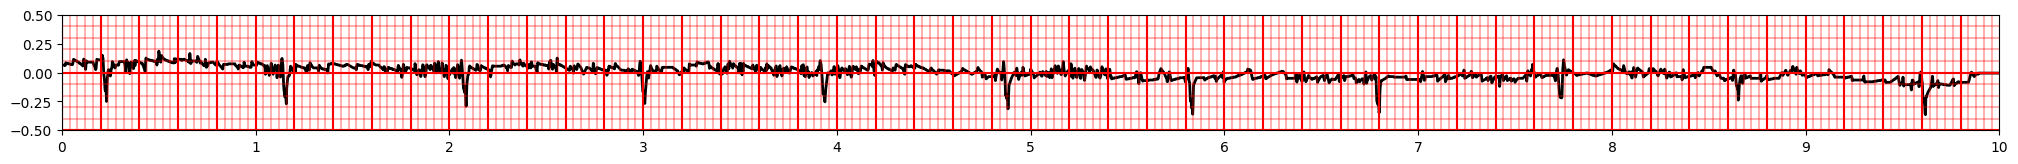

Signal: aVR


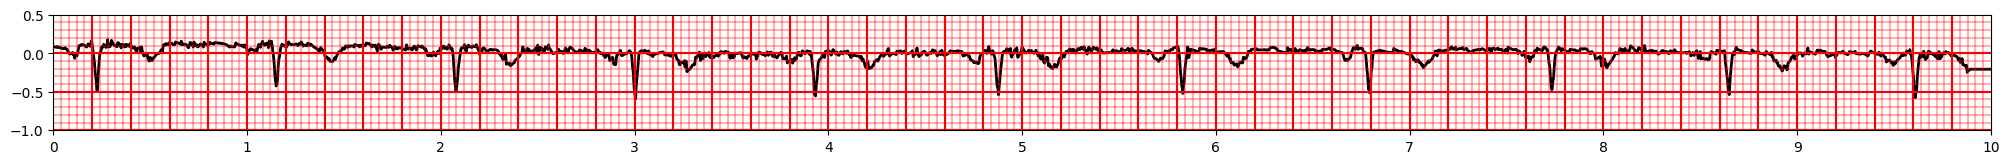

Signal: aVL


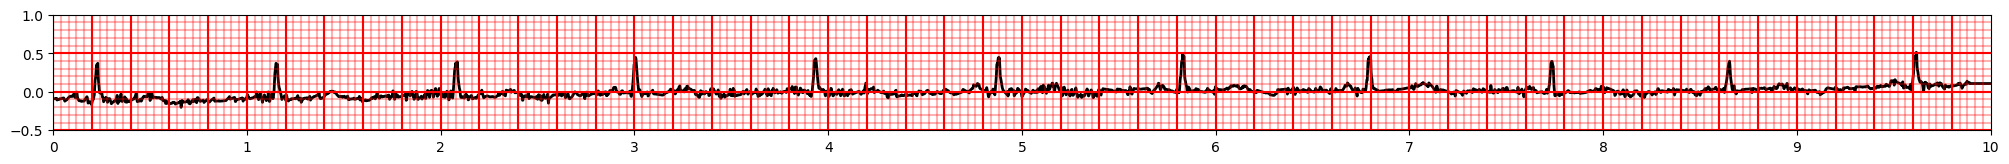

Signal: aVF


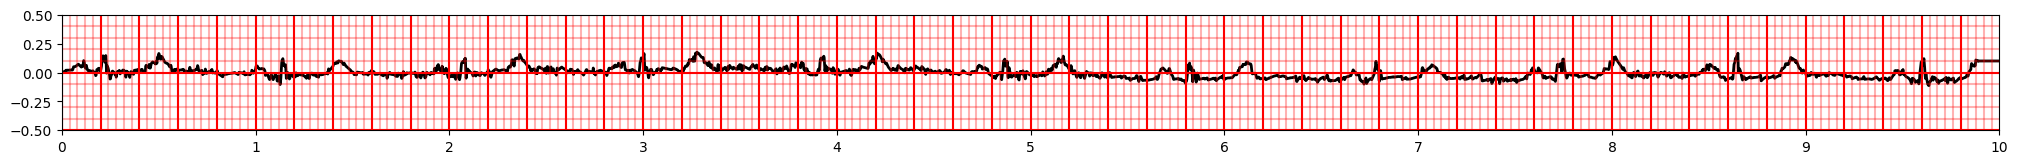

Signal: V1


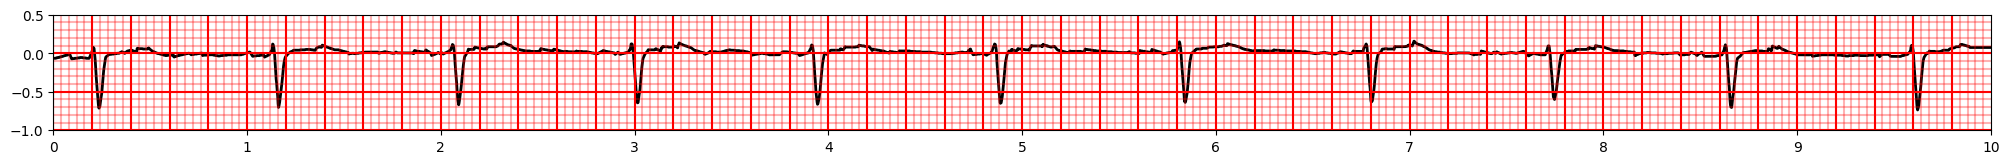

Signal: V2


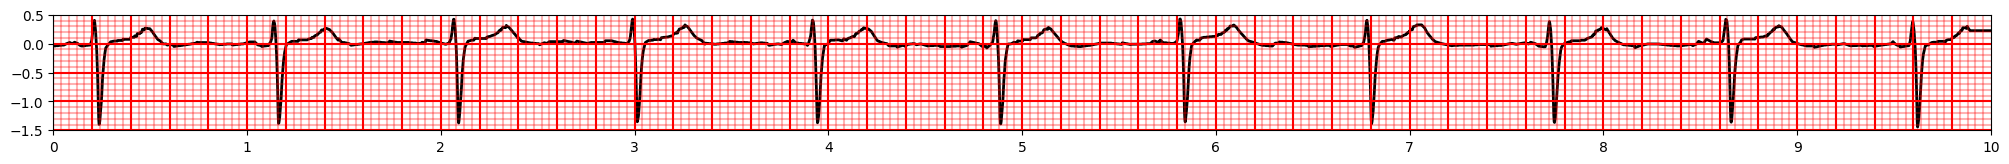

Signal: V3


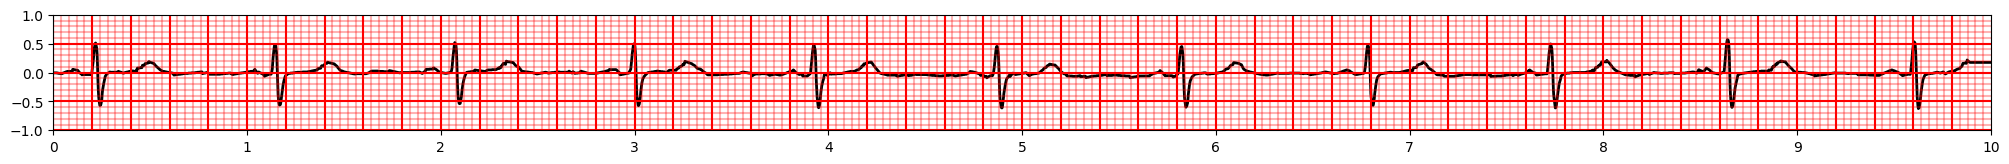

Signal: V4


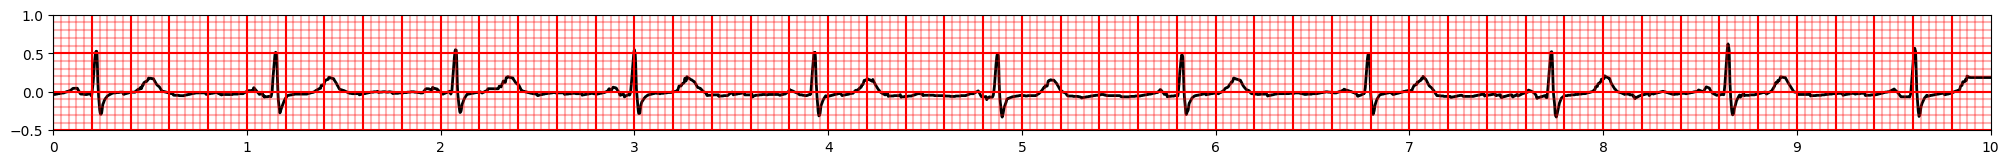

Signal: V5


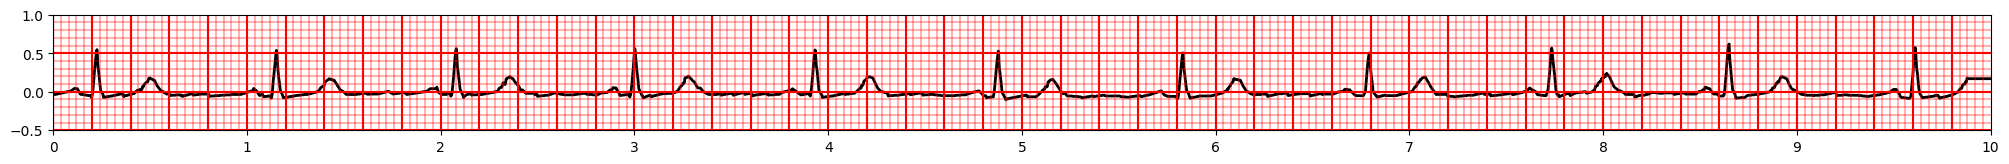

Signal: V6


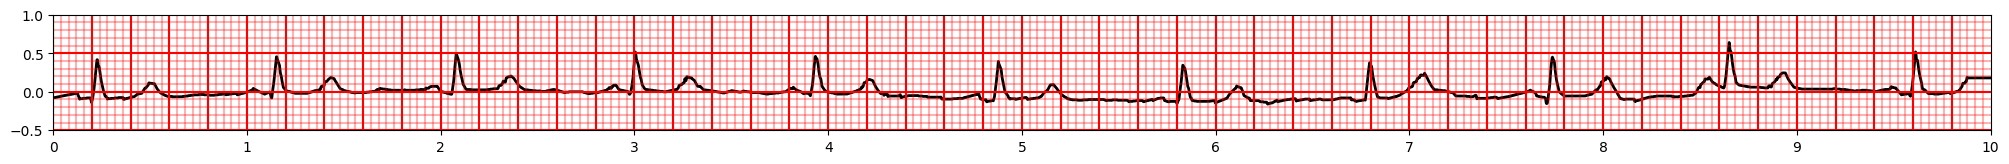

Shape of data: (5000, 12)


In [27]:
ptbxl = PTBXL(sampling_rate=SamplingRate.HZ_500)
record = ptbxl.load_record(1)
for i in range(len(Lead)):
    print(f"Signal: {Lead(i).name}")
    record.draw_ecg(Lead(i).value)

#shape of data
print("Shape of data:", record.data.shape)


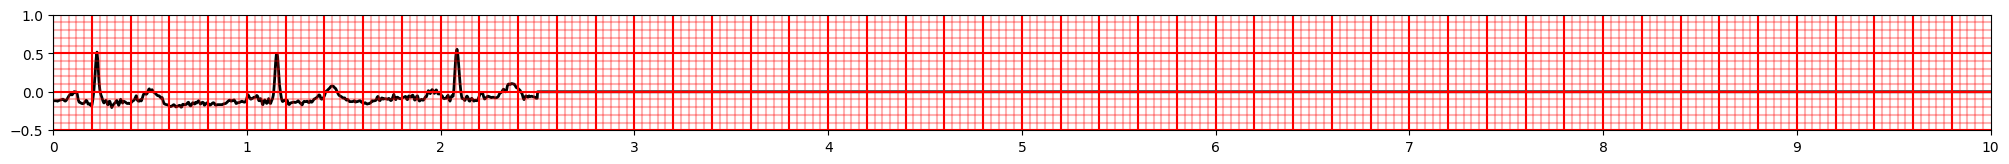

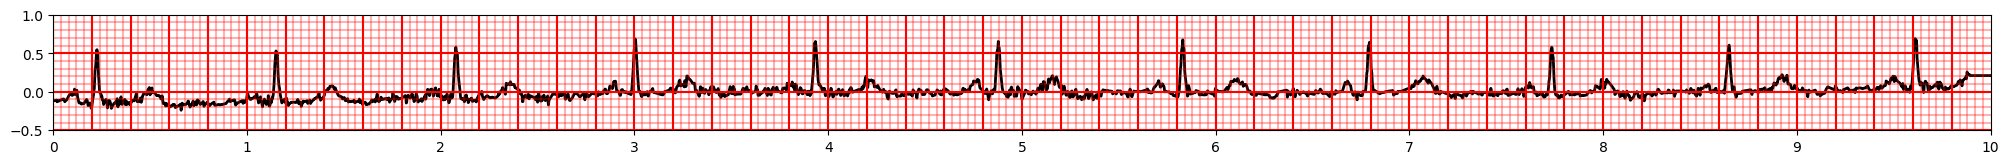

In [28]:
converted_record.draw_ecg(Lead.I)
record.draw_ecg(Lead.I)